# <font color="orange">Lending Club Case Study</font>

## Import the python packages required for the Lending Club Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data sourcing

In [2]:
#df_lending_club = pd.read_csv("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/Lending Load club/loan.csv",header=0,low_memory=False)

df_lending_club = pd.read_csv("/Users/charanhulmani/Desktop/UpGrad/MSc-IITB & LJMU/Case Study/LendingClubCaseStudy/loan.csv",header=0,
                 low_memory=False)
print(df_lending_club.shape)
print(df_lending_club.info())
df_lending_club.head()



(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleansing
`1. ` Remove id and member_id columns as they are just unique IDs of loan listing and borrower, which doesn't help to explore any relationships by analysizing the data

In [3]:
df_lending_club.drop(columns=['id','member_id'],inplace=True)

`2. ` Remove the variables having only one distinct value as these will not help to explore any relationships by analysizing the data

In [4]:
df_lending_club = df_lending_club[[col for col in df_lending_club.columns if len(df_lending_club[col].unique()) > 1]]


`3. ` Calculate the percentage of missing values of each column

In [5]:
df_lending_club.isnull().mean() * 100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


`4.` Remove the columns which are missing 60% of values

In [6]:
min_count = (0.60) * df_lending_club.shape[0] + 1
df_lending_club.dropna(axis=1, thresh = min_count,inplace=True)

`5. ` Remove desc, title and url columns<br>
   -  Description column is missing 30% of values and it's high level info is covered in title<br>
   -  URL column doesn't have much info other than the loan id in the url query parameter
   -  After looking into the title closely, it is looking like a high level description of the loan `purpose` and it can be removed as the purpose column actually captured that data as a category

In [7]:
df_lending_club.drop(columns=['url','desc','title'],inplace=True)

`6. ` Check the value counts in each column of the dataframe to get an understanding of how the values are distributed

In [8]:
[(col, round((df_lending_club[col].value_counts().to_frame().head()/len(df_lending_club)) * 100)) for col in df_lending_club.columns]


[('loan_amnt',
         loan_amnt
  10000        7.0
  12000        6.0
  5000         5.0
  6000         5.0
  15000        5.0),
 ('funded_amnt',
         funded_amnt
  10000          7.0
  12000          6.0
  5000           5.0
  6000           5.0
  15000          4.0),
 ('funded_amnt_inv',
           funded_amnt_inv
  5000.0               3.0
  10000.0              3.0
  6000.0               3.0
  12000.0              3.0
  8000.0               2.0),
 ('term',
              term
   36 months  73.0
   60 months  27.0),
 ('int_rate',
          int_rate
  10.99%       2.0
  13.49%       2.0
  11.49%       2.0
  7.51%        2.0
  7.88%        2.0),
 ('installment',
          installment
  311.11          0.0
  180.96          0.0
  311.02          0.0
  150.80          0.0
  368.45          0.0),
 ('grade',
     grade
  B   30.0
  A   25.0
  C   20.0
  D   13.0
  E    7.0),
 ('sub_grade',
      sub_grade
  B3        7.0
  A4        7.0
  A5        7.0
  B5        7.0
  B4        6.0

`7. ` From the above observation, below columns have values mostly 0 with few NAN(got to know after checking in excel spreadsheet). The columns/attributes/variables will not help in data analyis and thus they could be removed.<br>
   -  collections_12_mths_ex_med <br>
   -  chargeoff_within_12_mths <br>
   -  tax_liens

In [9]:
columns_to_remove = ['collections_12_mths_ex_med',
                     'chargeoff_within_12_mths',
                     'tax_liens']
df_lending_club.drop(columns = columns_to_remove,inplace = True)

`8. ` Check the value counts of the remaining columns of the dataframe to get an understanding of how the values are distributed. 

In [10]:
[(col, (round((df_lending_club[col].value_counts().to_frame()/len(df_lending_club)) * 100))) for col in df_lending_club.columns]


[('loan_amnt',
         loan_amnt
  10000        7.0
  12000        6.0
  5000         5.0
  6000         5.0
  15000        5.0
  ...          ...
  22875        0.0
  8175         0.0
  19475        0.0
  21225        0.0
  22550        0.0
  
  [885 rows x 1 columns]),
 ('funded_amnt',
         funded_amnt
  10000          7.0
  12000          6.0
  5000           5.0
  6000           5.0
  15000          4.0
  ...            ...
  26250          0.0
  24725          0.0
  31750          0.0
  22625          0.0
  22350          0.0
  
  [1041 rows x 1 columns]),
 ('funded_amnt_inv',
                funded_amnt_inv
  5000.000000               3.0
  10000.000000              3.0
  6000.000000               3.0
  12000.000000              3.0
  8000.000000               2.0
  ...                       ...
  4944.213109               0.0
  18400.281660              0.0
  14659.820000              0.0
  6294.151315               0.0
  11808.924370              0.0
  
  [8205 rows x 1 co

`9. ` Looking at the above value counts, 85+ percent of the values in the below variables are having zero values and thus these variables doesn't help in finding a relationship to see whether the loan may go default because of these variables. So, removing these variables.<br>
   - delinq_2yrs
   - pub_rec
   - out_prncp
   - out_prncp_inv
   - total_rec_late_fee
   - recoveries
   - collection_recovery_fee
   - pub_rec_bankruptcies

In [11]:
columns_to_remove= ['delinq_2yrs', 
                    'pub_rec', 
                    'out_prncp', 
                    'out_prncp_inv',
                    'total_rec_late_fee',
                    'recoveries',
                    'collection_recovery_fee',
                    'pub_rec_bankruptcies']

df_lending_club.drop(columns=columns_to_remove,inplace=True)


`10. ` If the loan_status is 'current', then that loan data will not help in identifying either a default or non-default loan borrower. So, remove the rows with loan_status is 'current'

In [12]:
df_lending_club = df_lending_club[(df_lending_club['loan_status'] != 'Current')]

`11. ` Find the percentage of null values in the dataframe

In [13]:
df_lending_club.isnull().mean()*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_prncp        0.000000
total_rec_int          0.000000
last_pymnt_d           0.184047
last_pymnt_amnt        0.000000
last_cre

`12. ` Standardize the values in emp_length(employee experience). Remove anything other than numbers from 0-9 and < symbol. Furthermore, impute NaN values with median Experience

In [14]:
def standardize_emp_length(emp_experience:str):
    emp_experience = re.sub(r'[^<,0-9]','',str(emp_experience))
    if emp_experience == '<1':
        return 0
    elif emp_experience == '':
        return np.nan
    else:
        return emp_experience

    
df_lending_club['emp_length'] = df_lending_club['emp_length'].apply(lambda x :standardize_emp_length(str(x)))

df_lending_club['emp_length']= df_lending_club['emp_length'].fillna(df_lending_club['emp_length'].median())

`13. ` Standardize term by removing the word months

In [15]:
df_lending_club['term'].replace(regex = '[^0-9]',value = '',inplace = True)

`14. ` Round off numeric decimal values with precision 2

In [16]:
df_lending_club = df_lending_club.round(decimals = 2)
df_lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           38577 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

`15. ` Find how many distinct emp_title exist

In [17]:
print('Total number of records: ',len(df_lending_club))
print('Total number of distinct employers: ', len(df_lending_club.emp_title.unique()))

print(df_lending_club.emp_title.value_counts().to_frame()['emp_title'].value_counts())

Total number of records:  38577
Total number of distinct employers:  28028
1      24937
2       1962
3        485
4        208
5        101
6         68
7         48
8         33
9         30
10        23
13        17
11        15
14        13
12        10
16         7
15         6
35         5
25         5
18         5
17         5
21         4
20         4
34         3
30         3
52         3
23         3
40         3
42         2
37         2
22         2
131        1
107        1
27         1
28         1
29         1
32         1
33         1
38         1
39         1
45         1
51         1
56         1
57         1
65         1
24         1
Name: emp_title, dtype: int64


` After identifying that there are 24,937 emp_title out of 28,028 have only one of their employee applied for loan. And, 1,962 Employers where 2 of their employees have taken loans. From this data and alos looking at the counts, emp_title could be removed from analysis as it may not help in exploring any information out of the data.`


In [18]:
df_lending_club.drop(columns=['emp_title'],inplace = True )

`16. ` Standardize and validate after standardizing the target variable loan_status

In [19]:
print(df_lending_club['loan_status'].value_counts(),'\n')
df_lending_club['loan_status'] = df_lending_club['loan_status'].apply(lambda x : 'Non-Default' if x == 'Fully Paid' else 'Default' )
print(df_lending_club['loan_status'].value_counts())

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64 

Non-Default    32950
Default         5627
Name: loan_status, dtype: int64


### Data Analysis
`1. ` Remove Customer behavior attributes. Behavior data is collected after lending the loan and doesn't help for risk analysis for new applicants<br>
   - Remove below columns/variable
       - issue_d
       - earliest_cr_line
       - inq_last_6mths
       - open_acc
       - revol_bal
       - total_acc
       - revol_util
       - total_pymnt
       - total_pymnt_inv
       - total_rec_prncp
       - total_rec_int
       - last_pymnt_d
       - last_pymnt_amnt
       - last_credit_pull_d

In [20]:
columns_to_remove = ['issue_d',
           'earliest_cr_line',
           'inq_last_6mths',
           'open_acc',
           'revol_bal',
           'revol_util',
           'total_acc',
           'total_pymnt',
           'total_pymnt_inv',
           'total_rec_prncp',
           'total_rec_int',
           'last_pymnt_d',
           'last_pymnt_amnt',
          'last_credit_pull_d']
df_lending_club.drop(columns = columns_to_remove, inplace = True)

df_lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  zip_code             38577 non-null  object 
 15  addr_state           38577 non-null 

`2. ` Change data type of int_rate to numeric float

In [21]:
df_lending_club['int_rate'] = df_lending_club['int_rate'].apply(lambda x: float(x.replace('%','')))

`3. ` Drop duplicates, if exist. In this case, no duplicates tuple of records founds after doing all the above cleansing

In [22]:
print('Total count of records before dropping duplicates: ', df_lending_club.shape,'\n')
df_lending_club.drop_duplicates(inplace = True)
print('Total count of records aftre dropping duplicates: ', df_lending_club.shape)

Total count of records before dropping duplicates:  (38577, 17) 

Total count of records aftre dropping duplicates:  (38577, 17)


#### <font color='green'>Keeping the zip_code column as is to help understand the values in it as zip codes without being descrete values</font>

In [23]:
df_lending_club.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Non-Default,credit_card,860xx,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Default,car,309xx,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Non-Default,small_business,606xx,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Non-Default,other,917xx,CA,20.00
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Non-Default,wedding,852xx,AZ,11.20
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Non-Default,debt_consolidation,280xx,NC,23.51
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Non-Default,car,900xx,CA,5.35
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Default,small_business,958xx,CA,5.55
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Default,other,774xx,TX,18.08
10,6500,6500,6500.0,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Non-Default,debt_consolidation,853xx,AZ,16.12


`4. ` Loan amount should be  >= funded amount and >= funded amount by investor. And, funded amount should be >= funded amount by investor. Here, in this dataset all the records are satisfying this condition.

In [24]:
print("Total records count before filtering based on loan amount,funded amount and by funded by investor", len(df_lending_club))
df_lending_club = df_lending_club[
                  (df_lending_club.loan_amnt >= df_lending_club.funded_amnt)
                & (df_lending_club.loan_amnt >= df_lending_club.funded_amnt_inv) 
                & (df_lending_club.funded_amnt >= df_lending_club.funded_amnt_inv)]

print("Total records count after filtering based on loan amount,funded amount and by funded by investor", len(df_lending_club),'\n')

print(df_lending_club.isnull().mean() * 100)
df_lending_club.head()

Total records count before filtering based on loan amount,funded amount and by funded by investor 38577
Total records count after filtering based on loan amount,funded amount and by funded by investor 38577 

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
zip_code               0.0
addr_state             0.0
dti                    0.0
dtype: float64


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Non-Default,credit_card,860xx,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Default,car,309xx,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Non-Default,small_business,606xx,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Non-Default,other,917xx,CA,20.00
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Non-Default,wedding,852xx,AZ,11.20


`5. ` <b>`Univariate Analysis`</b> Checking outliers using boxplot

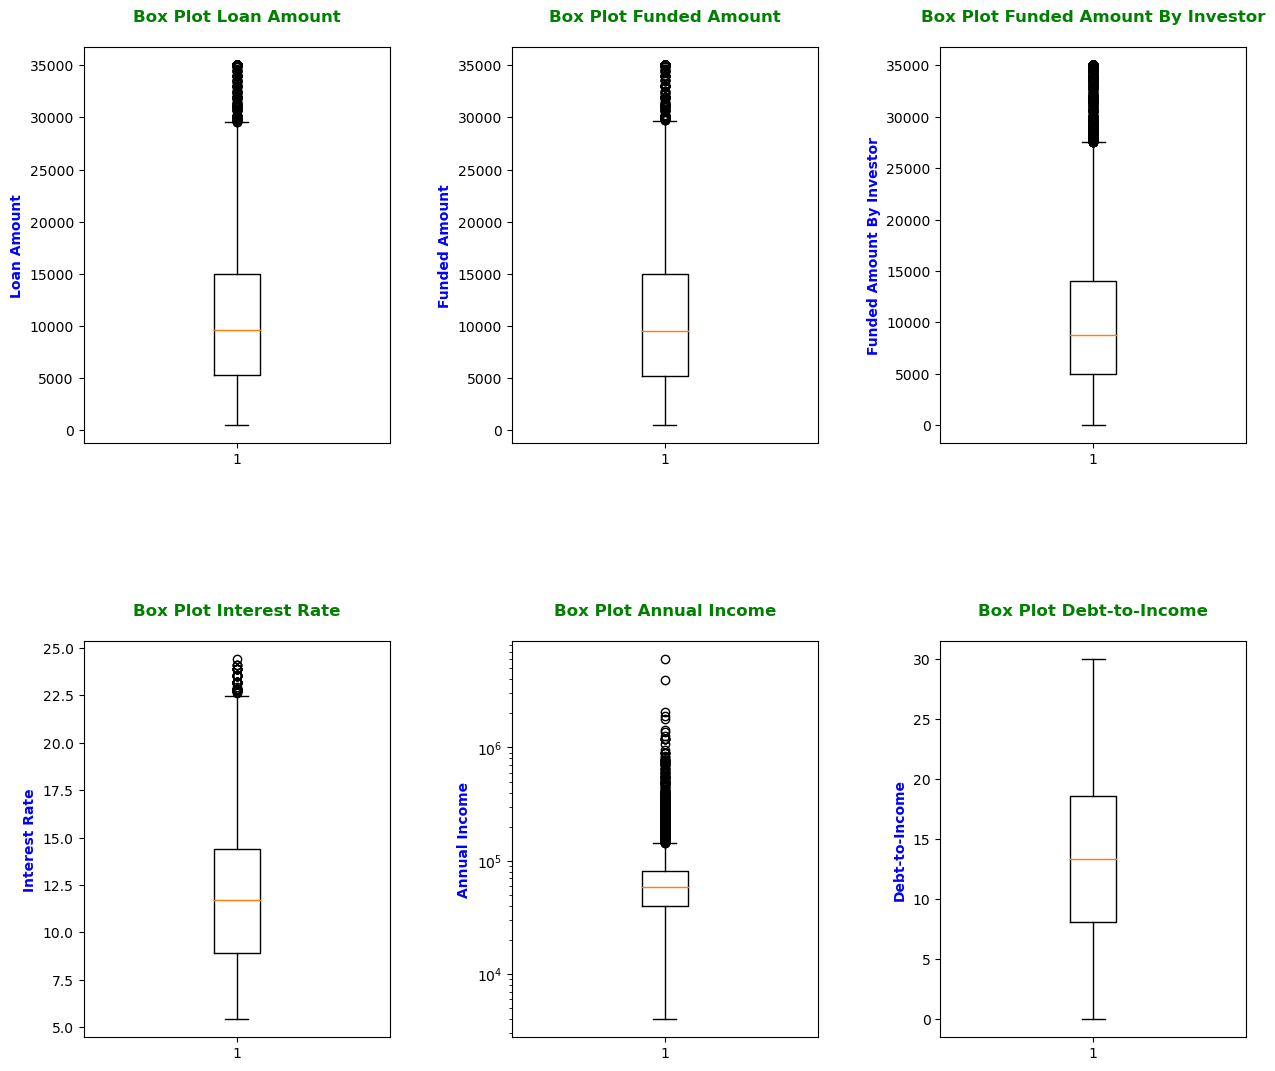

In [25]:
fig, ax = plt.subplots(2,3, sharey=False,figsize=(15,10))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.4)

ax[0,0].set_title('Box Plot Loan Amount\n', fontweight='bold', c='g')
ax[0,0].set_ylabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[0,0].boxplot(df_lending_club.loan_amnt)

ax[0,1].set_title('Box Plot Funded Amount\n' , fontweight='bold', c='g')
ax[0,1].set_ylabel('Funded Amount',fontsize=10,fontweight='bold',c='b')
ax[0,1].boxplot(df_lending_club.funded_amnt)

ax[0,2].set_title('Box Plot Funded Amount By Investor\n', fontweight='bold', c='g')
ax[0,2].set_ylabel('Funded Amount By Investor',fontsize=10,fontweight='bold',c='b')
ax[0,2].boxplot(df_lending_club.funded_amnt_inv)

ax[1,0].set_title('Box Plot Interest Rate\n' , fontweight='bold', c='g')
ax[1,0].set_ylabel('Interest Rate',fontsize=10,fontweight='bold',c='b')
ax[1,0].boxplot(df_lending_club.int_rate)

ax[1,1].set_title('Box Plot Annual Income\n', fontweight='bold', c='g')
ax[1,1].set_ylabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,1].set_yscale('log')
ax[1,1].boxplot(df_lending_club.annual_inc)

ax[1,2].set_title('Box Plot Debt-to-Income\n' , fontweight='bold', c='g')
ax[1,2].set_ylabel('Debt-to-Income',fontsize=10,fontweight='bold',c='b')
ax[1,2].boxplot(df_lending_club.dti)

plt.show()

`6. ` Check correlation 

In [26]:
df_lending_club.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
loan_amnt,1.000000,0.981790,0.937922,0.301265,0.932260,0.268999,0.062436
funded_amnt,0.981790,1.000000,0.956172,0.304930,0.958035,0.264798,0.062194
funded_amnt_inv,0.937922,0.956172,1.000000,0.297473,0.905464,0.251981,0.070663
int_rate,0.301265,0.304930,0.297473,1.000000,0.277203,0.048899,0.110913
installment,0.932260,0.958035,0.905464,0.277203,1.000000,0.267842,0.052038
annual_inc,0.268999,0.264798,0.251981,0.048899,0.267842,1.000000,-0.121530
dti,0.062436,0.062194,0.070663,0.110913,0.052038,-0.121530,1.000000


#### `From above correlation matrix we can say,`<br>
   - there is a high positive correlation between loan amount, funded amount, funded amount by investor and installment. This makes sense in general as the loan requested is directly proportional to approved and the actual lened amount to borrowers.
   - there is a slight positive correlation between loan amount to annual income, funded amount, funded by investor
   - annual income to dti correlation is negative, which makes sense as the debt increases compared to income when a borrower takes a loan
    

`6. ` Removing outliers in,
   - Annual income
   - loan amount

In [27]:
# Calculate percentile
Q1,Q3 = np.percentile(df_lending_club['annual_inc'],q=[25,75])
# Find Inter-Quartile-Range
IQR = Q3 - Q1
#Remove outliers
df_lending_club = df_lending_club[~((df_lending_club['annual_inc'] < (Q1 - 1.5 * IQR)) | (df_lending_club['annual_inc'] > (Q3 + 1.5 * IQR)))]

# Calculate percentile
Q1,Q3 = np.percentile(df_lending_club['loan_amnt'],q=[25,75])
# Find Inter-Quartile-Range
IQR = Q3 - Q1
#Remove outliers
df_lending_club = df_lending_club[~((df_lending_club['loan_amnt'] < (Q1 - 1.5 * IQR)) | (df_lending_club['loan_amnt'] > (Q3 + 1.5 * IQR)))]


`7. ` <b>`Univariate Analysis`</b> Checking the distribution of Loan amount, Funded Amount, Fonded Amount by Investor, Interest Rate, Annual Income and  DTI

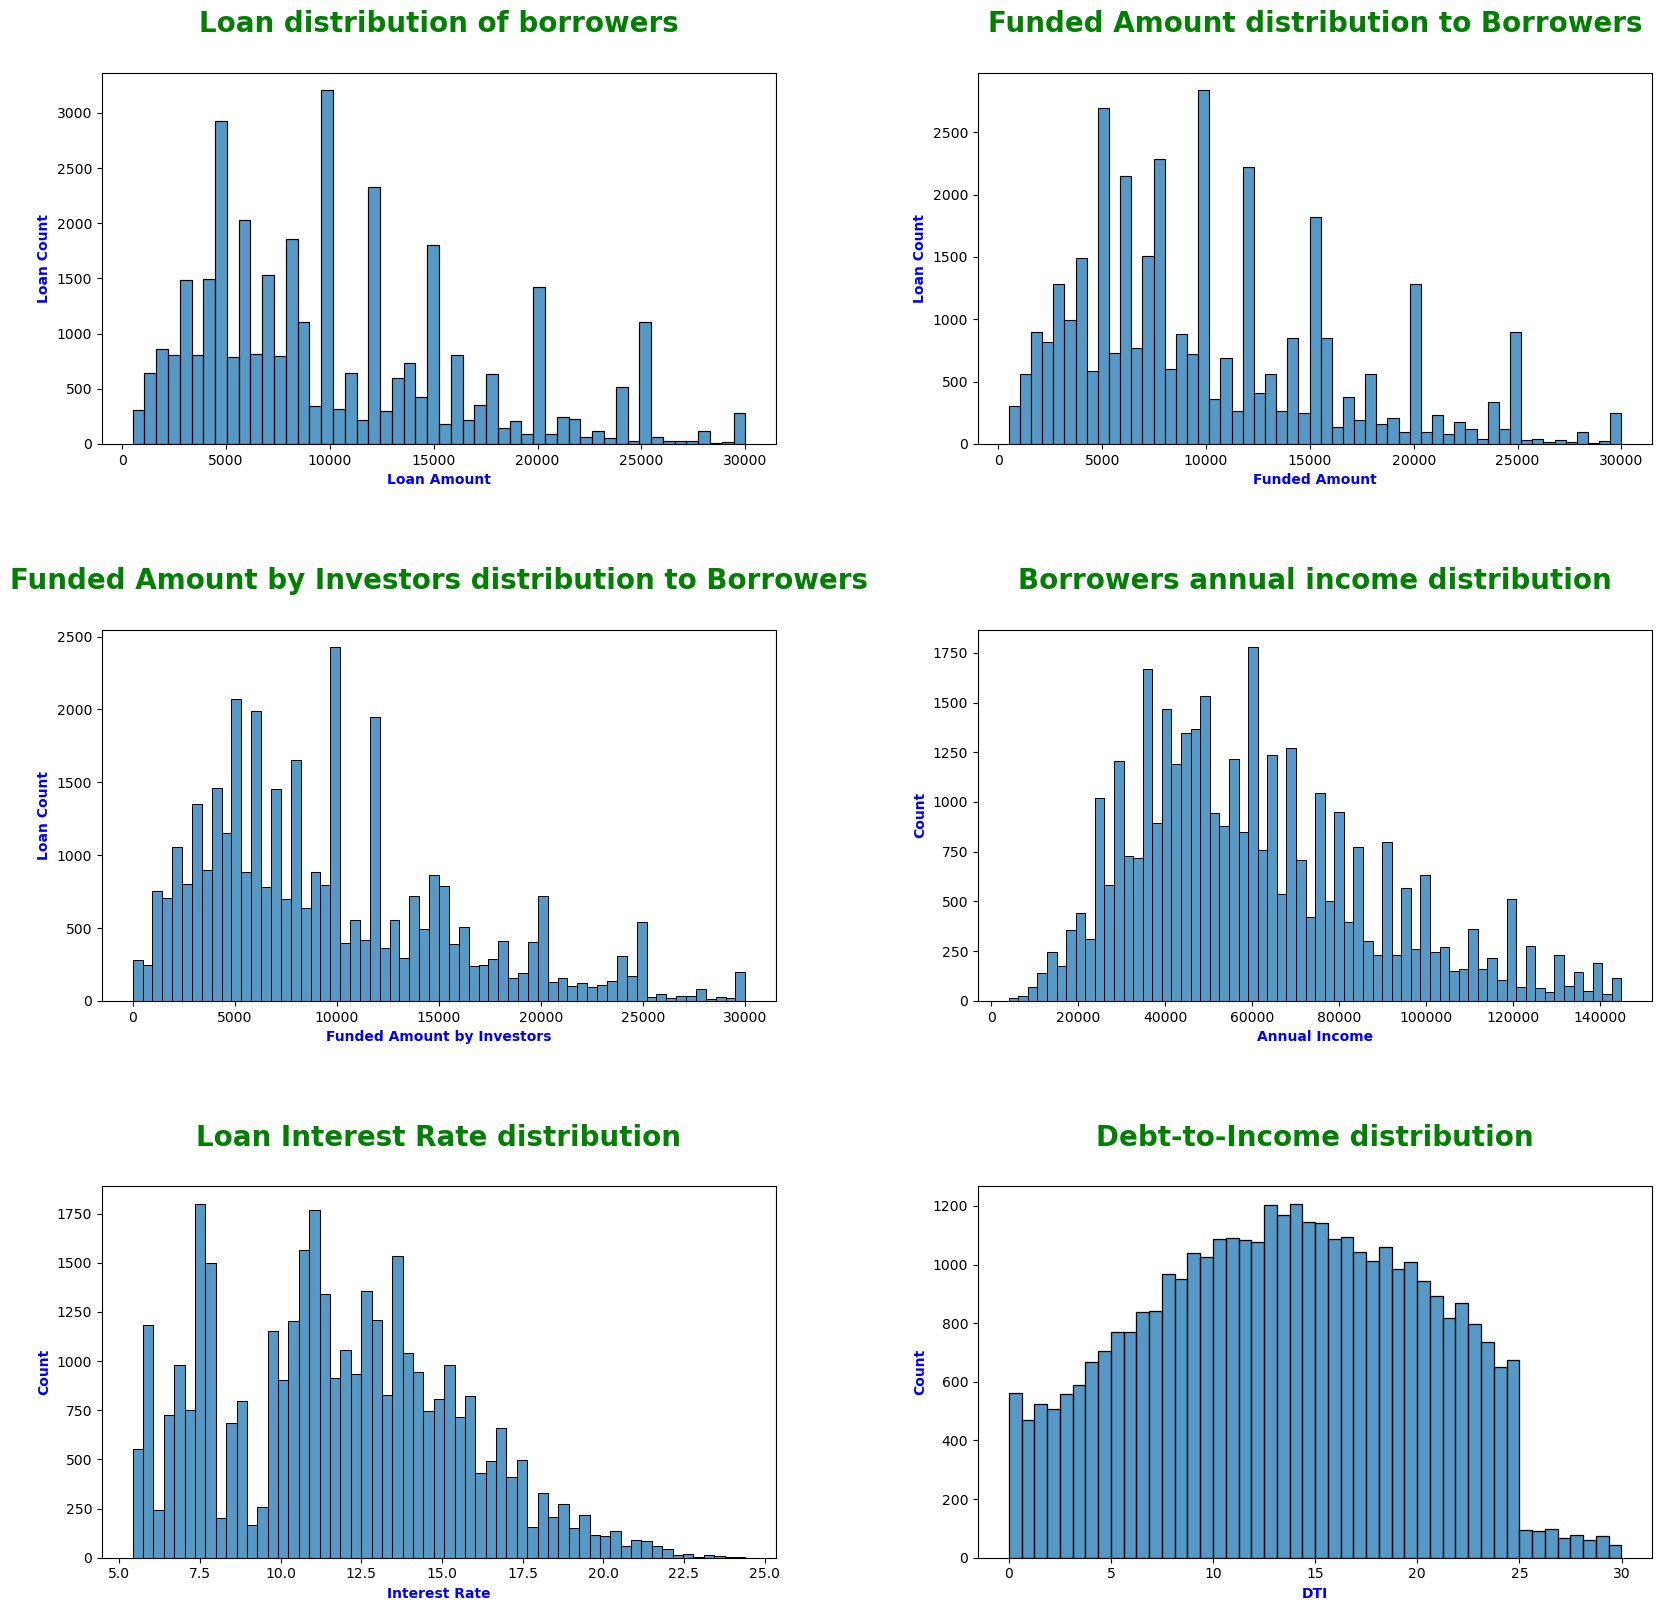

In [55]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.3)

sns.histplot(ax=ax[0,0],x=df_lending_club.loan_amnt)
ax[0,0].set_title('Loan distribution of borrowers\n',fontsize="20",fontweight='bold' ,c='g')
ax[0,0].set_xlabel('Loan Amount',fontsize=10,fontweight='bold',c='b')
ax[0,0].set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[0,1],x=df_lending_club.funded_amnt)
ax[0,1].set_title('Funded Amount distribution to Borrowers\n',fontsize="20",fontweight='bold' ,c='g')
ax[0,1].set_xlabel('Funded Amount',fontsize=10,fontweight='bold',c='b')
ax[0,1].set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[1,0],x=df_lending_club.funded_amnt_inv)
ax[1,0].set_title('Funded Amount by Investors distribution to Borrowers\n',fontsize="20" ,fontweight='bold',c='g')
ax[1,0].set_xlabel('Funded Amount by Investors',fontsize=10,fontweight='bold',c='b')
ax[1,0].set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[1,1],x=df_lending_club.annual_inc)
ax[1,1].set_title('Borrowers annual income distribution\n',fontsize="20" ,fontweight='bold',c='g')
ax[1,1].set_xlabel('Annual Income',fontsize=10,fontweight='bold',c='b')
ax[1,1].set_ylabel('Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[2,0],x=df_lending_club.int_rate)
ax[2,0].set_title('Loan Interest Rate distribution\n',fontsize="20" ,fontweight='bold',c='g')
ax[2,0].set_xlabel('Interest Rate',fontsize=10,fontweight='bold',c='b')
ax[2,0].set_ylabel('Count',fontsize=10,fontweight='bold',c='b')

sns.histplot(ax=ax[2,1],x=df_lending_club.dti)
ax[2,1].set_title('Debt-to-Income distribution\n',fontsize="20" ,fontweight='bold',c='g')
ax[2,1].set_xlabel('DTI',fontsize=10,fontweight='bold',c='b')
ax[2,1].set_ylabel('Count',fontsize=10,fontweight='bold',c='b')
plt.show()

`8. `<b>Segmented Univariate Analysis on Categorical Variables</b> <br>Understand the distribution of loans with respect to the categories of,
   - grade
   - home_ownership 
   - verification_status
   - purpose
   - loan_status
   

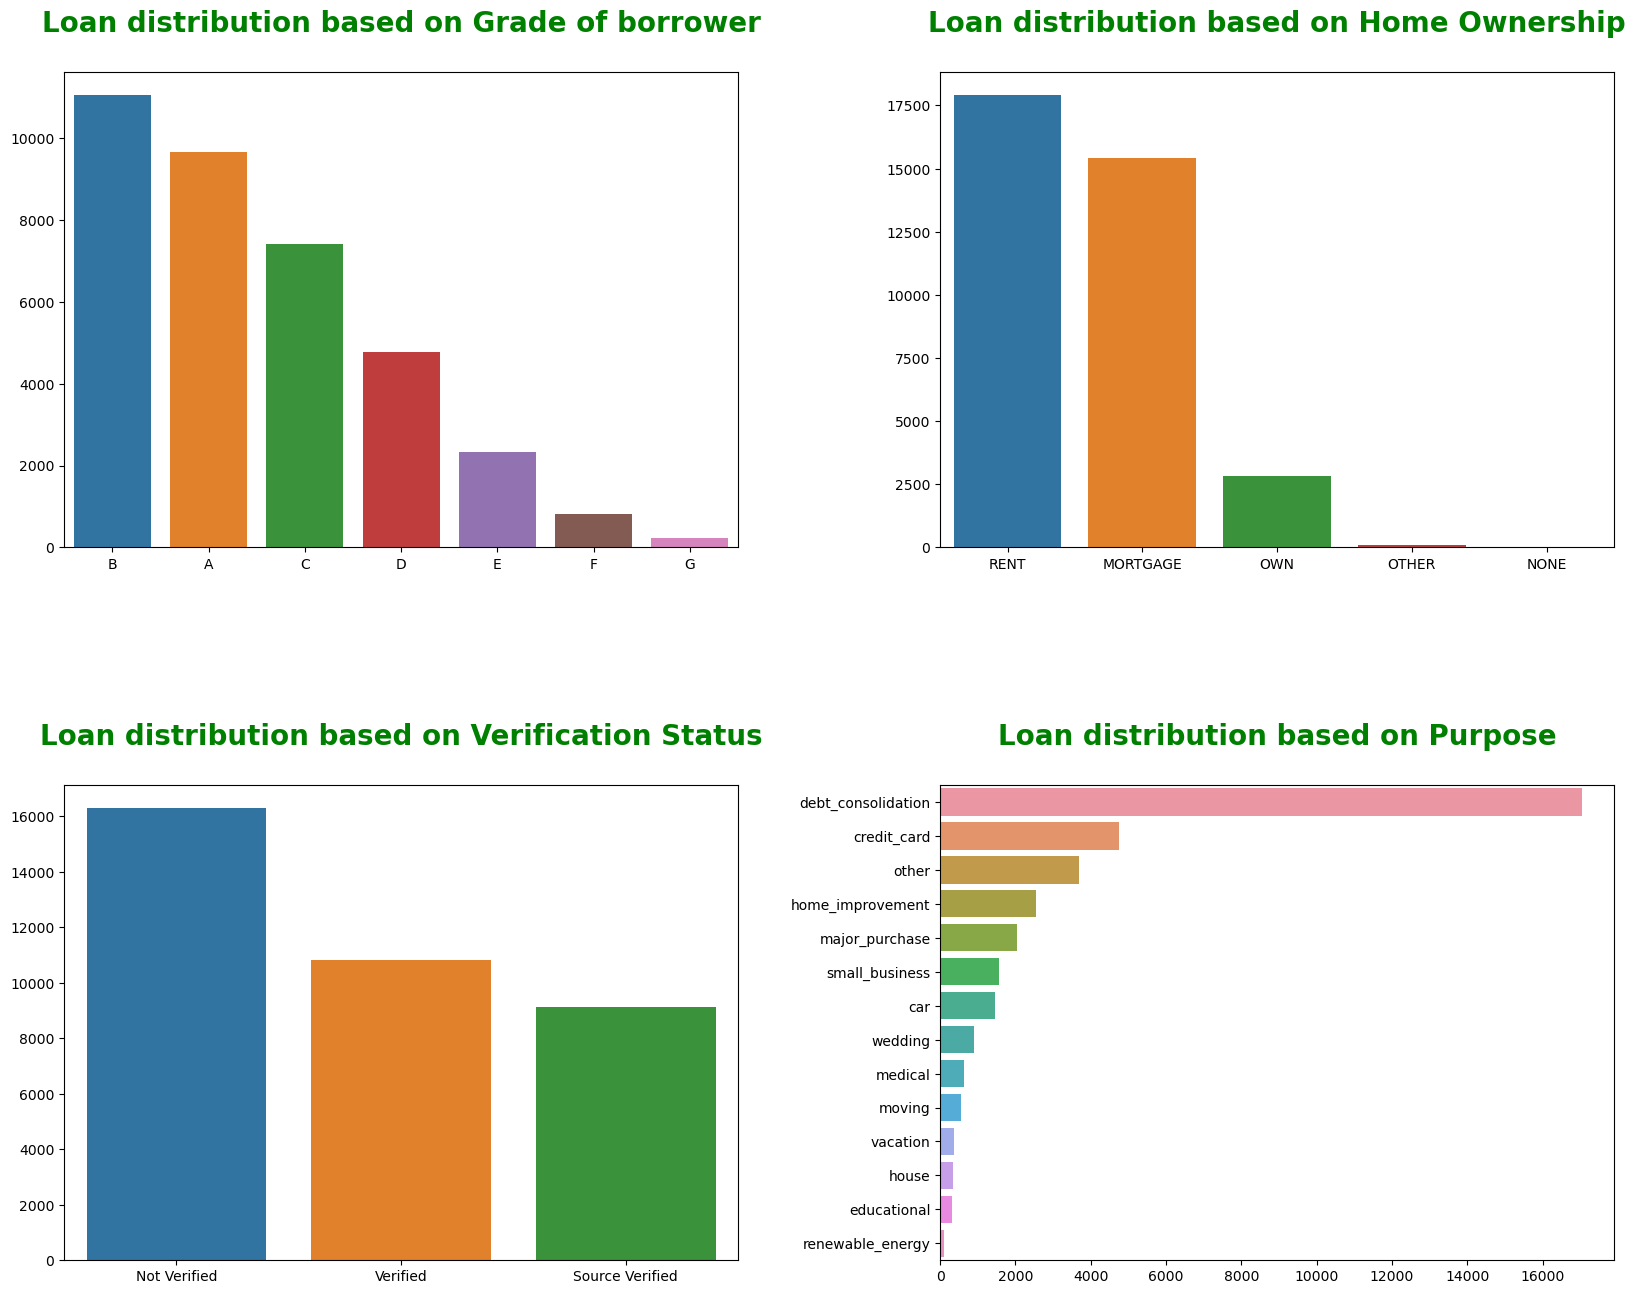

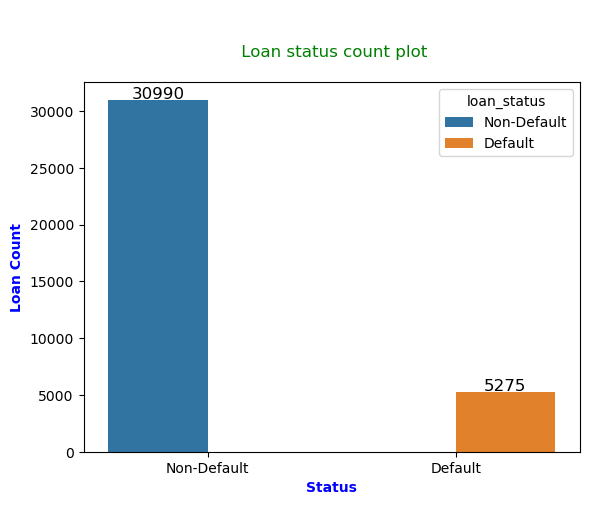

% of loan status across data

             loan_status
Non-Default         85.0
Default             15.0


In [60]:
grade_value_counts =  df_lending_club.grade.value_counts()
home_ownership_value_counts =  df_lending_club.home_ownership.value_counts()
verification_status_value_counts = df_lending_club.verification_status.value_counts()
purpose_value_counts = df_lending_club.purpose.value_counts()

fig, ax = plt.subplots(2,2, figsize=(20,12))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.3)

sns.barplot(ax=ax[0,0],x=grade_value_counts.index,y=grade_value_counts.values)
ax[0,0].set_title('Loan distribution based on Grade of borrower\n',fontsize="20",fontweight='bold' ,c='g')

sns.barplot(ax=ax[0,1],x=home_ownership_value_counts.index,y=home_ownership_value_counts.values)
ax[0,1].set_title('Loan distribution based on Home Ownership\n',fontsize="20",fontweight='bold' ,c='g')

sns.barplot(ax=ax[1,0],x=verification_status_value_counts.index,y=verification_status_value_counts.values)
ax[1,0].set_title('Loan distribution based on Verification Status\n',fontsize="20" ,fontweight='bold',c='g')

purpose_value_counts_barplot = sns.barplot(ax=ax[1,1],y=purpose_value_counts.index,x=purpose_value_counts.values)
ax[1,1].set_title('Loan distribution based on Purpose\n',fontsize="20",fontweight='bold' ,c='g')

plt.show()


# checking different loan status counts in data
plot = sns.countplot(x='loan_status', data=df_lending_club,hue='loan_status')
plot.set_title('\n\n Loan status count plot\n', c='g')
plot.set_xlabel('Status',fontsize=10,fontweight='bold',c='b')
plot.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
for bar in plot.patches:
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plot.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=12,xytext = (0, 4), 
                   textcoords = 'offset points')
    
plt.show()
print("% of loan status across data\n")
print((df_lending_club['loan_status'].value_counts(normalize=True).to_frame().round(decimals = 2) *100))

## Univariate Analysis : Categorical Variable Plots

In [132]:
def get_default_non_default_loan_percentage_and_ratio(column_name:str):
    
    df_default_loan_column_name = df_lending_club[(df_lending_club['loan_status']=='Default')][[column_name]]
    df_non_default_loan_column_name = df_lending_club[(df_lending_club['loan_status']=='Non-Default')][[column_name]]

    df_default_loan_column_name_percent = df_default_loan_column_name.value_counts().to_frame()/len(df_lending_club) * 100
    
    df_non_default_loan_column_name_percent = df_non_default_loan_column_name.value_counts().to_frame()/len(df_lending_club) *100

    df_loan_column_name_percent = df_default_loan_column_name_percent.merge(df_non_default_loan_column_name_percent,
                                                                                how = 'inner' , on = column_name)

    df_loan_column_name_percent.rename(columns={'0_x':'% Default','0_y':'% Non-Default'},inplace=True)
    df_loan_column_name_percent['% Total'] = df_loan_column_name_percent['% Default'] + df_loan_column_name_percent['% Non-Default']
    df_loan_column_name_percent['Ratio'] = df_loan_column_name_percent['% Default']/df_loan_column_name_percent['% Non-Default']
    df_loan_column_name_percent = df_loan_column_name_percent.sort_values(by='Ratio').round(decimals=2)
    
    result = []
    for i, row in df_loan_column_name_percent.iterrows():
        result.append(str(int(row['% Default'] * 100)) + ' out of ' + str(int(row['% Total']*100)))
        
    
    df_loan_column_name_percent['Risk to become default'] = result                          
    return(df_loan_column_name_percent)


       % Default  % Non-Default  % Total  Ratio Risk to become default
grade                                                                 
A           1.64          24.97    26.60   0.07        164 out of 2660
B           3.75          26.70    30.45   0.14        375 out of 3045
C           3.58          16.86    20.44   0.21        358 out of 2044
D           2.91          10.24    13.16   0.28        291 out of 1316
E           1.71           4.70     6.41   0.36         171 out of 641
F           0.72           1.56     2.27   0.46          72 out of 227
G           0.24           0.43     0.67   0.55           24 out of 67


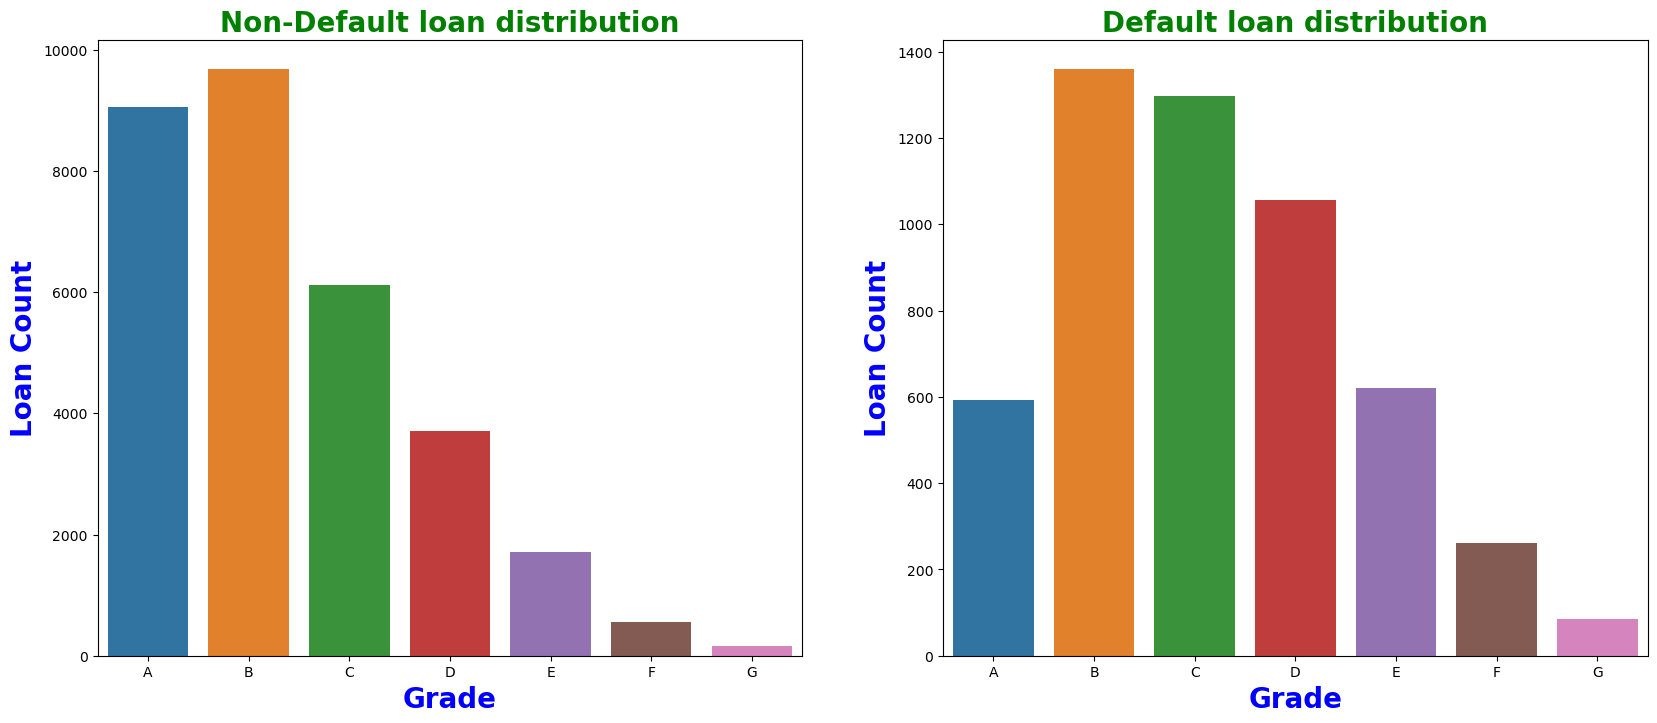

In [133]:
print(get_default_non_default_loan_percentage_and_ratio('grade'))

grade_order_to_display = sorted(df_lending_club.grade.unique().tolist())

fig, ax = plt.subplots(1,2, figsize= (20,8), sharey= False)

sns.countplot(ax=ax[0], x='grade',order=grade_order_to_display,
              data=df_lending_club[df_lending_club['loan_status']=='Non-Default'])
ax[0].set_xlabel('Grade',fontsize=20,fontweight='bold',c='b')
ax[0].set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
ax[0].set_title('Non-Default loan distribution',fontsize=20, fontweight='bold',c='g')

sns.countplot(ax=ax[1], x='grade',order=grade_order_to_display,
              data=df_lending_club[df_lending_club['loan_status']=='Default'])
ax[1].set_xlabel('Grade',fontsize=20,fontweight='bold',c='b')
ax[1].set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
ax[1].set_title('Default loan distribution', fontsize=20,fontweight='bold',c='g')
plt.show()


### Inference
From the barplots, % of Default and Non-Default values along with the ratio of Defaults to Non-Defaults for each grade, 
- we can say that the borrower of a grade will most likely will be a defaulter in the below order
    - G, F, E, D, C, B, A

- we can say that the borrower of a grade will most likely will pay off the loan in the below order
    - A, B, C, D, E, F, G

Overall,
- Grade A borrowers are very trustworthy people and could be offered loans
- Grade G borrowers are  untrustworthy people and one should avoid approving the loans to them


In [34]:
## Now merging in sub grade along with grade variable

## Removing the letter in the sub_grade and keeping the number only, which is good enought to Identify the subgrade
# and it helps to visualize the data in countplot

df_lending_club.sub_grade = df_lending_club.sub_grade.apply(lambda x : x[-1])
df_lending_club.sub_grade.unique()

array(['2', '4', '5', '1', '3'], dtype=object)

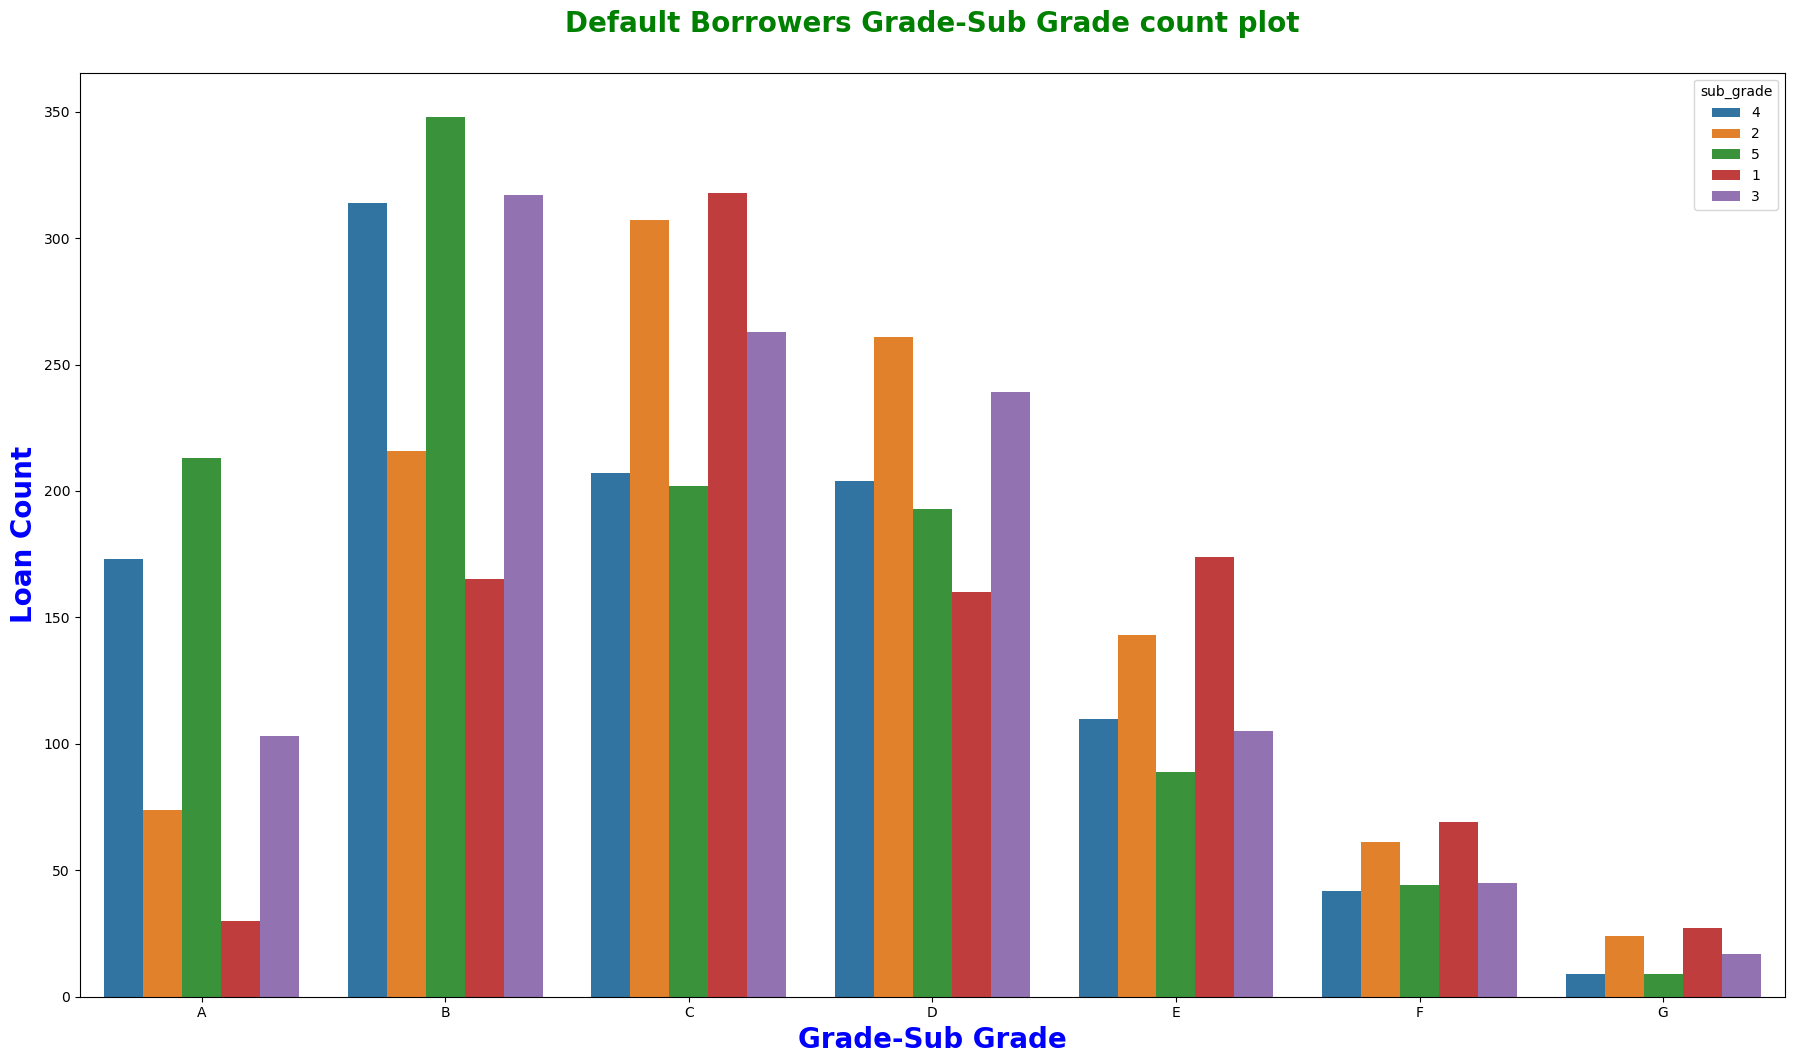

In [35]:
## Sub Grade distibution for persons who have defaulted

fig, ax = plt.subplots(figsize=(22,12))
ax = sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df_lending_club[df_lending_club['loan_status']=='Default'])
ax.set_title('Default Borrowers Grade-Sub Grade count plot\n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Grade-Sub Grade',fontsize=20,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
plt.show()

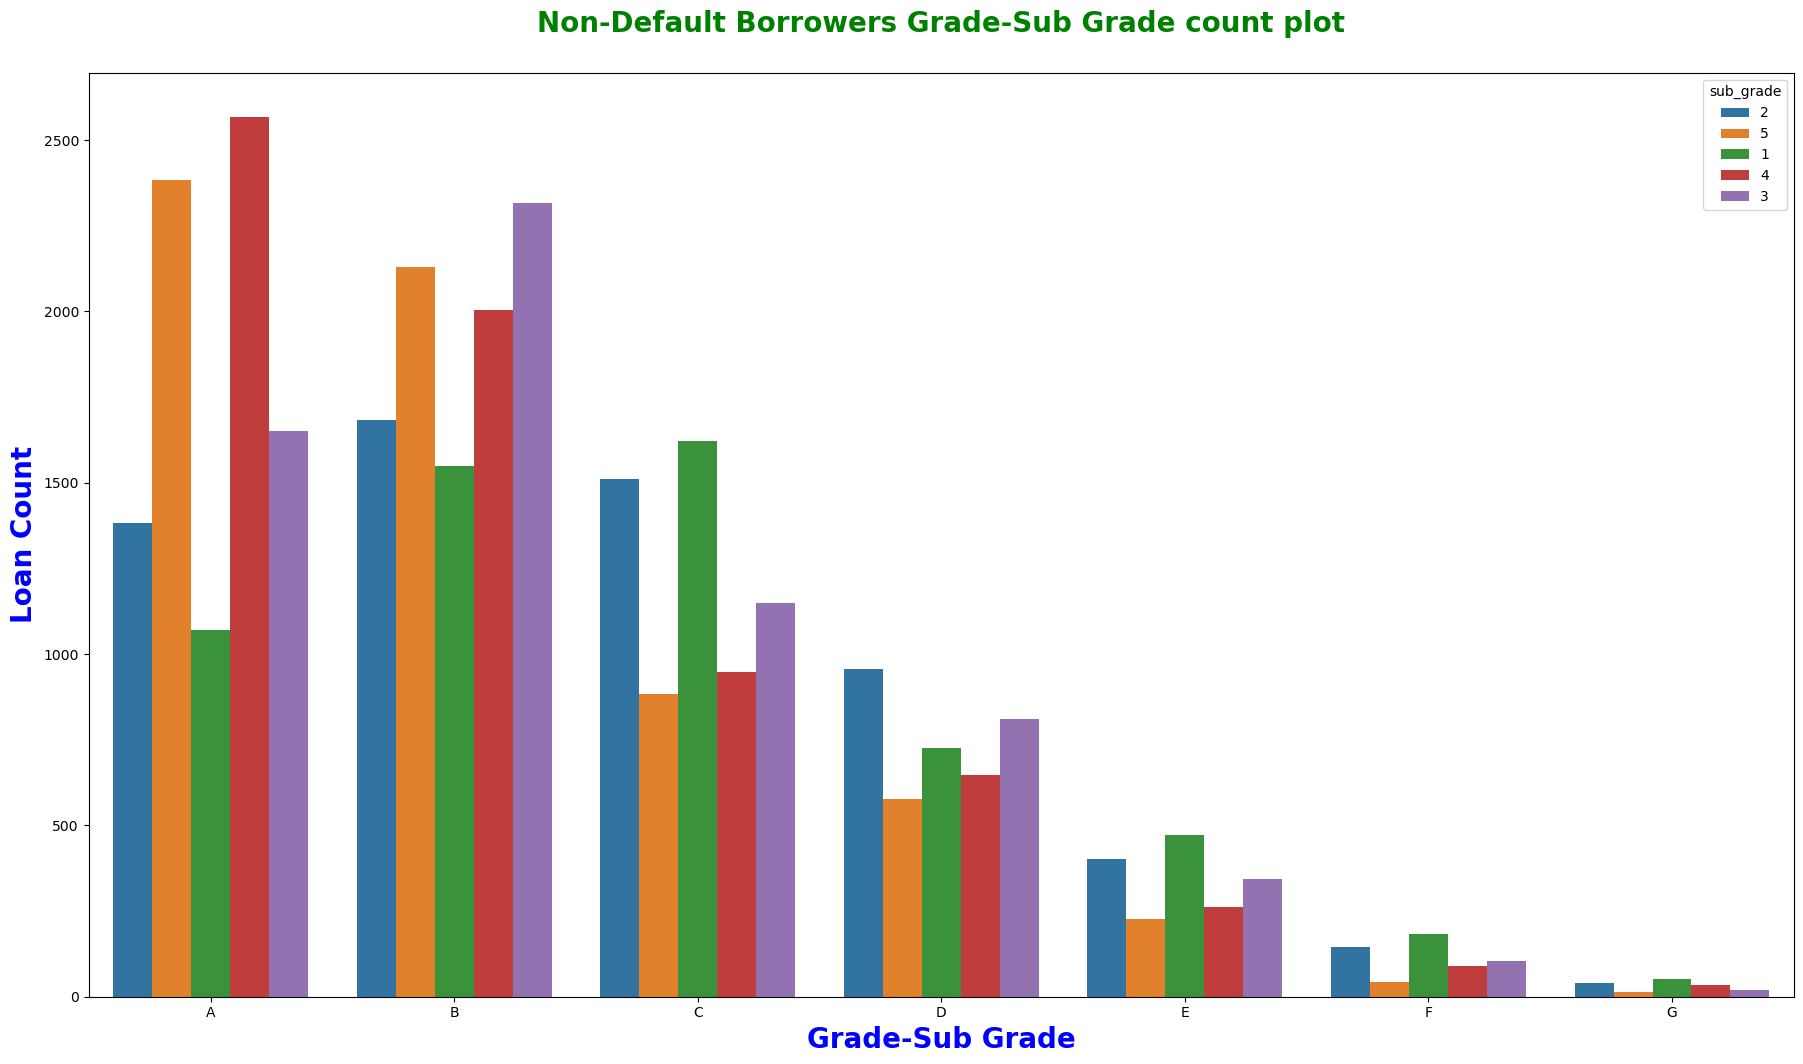

In [36]:
fig, ax = plt.subplots(figsize=(22,12))
ax = sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df_lending_club[df_lending_club['loan_status']=='Non-Default'])
ax.set_title('Non-Default Borrowers Grade-Sub Grade count plot\n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Grade-Sub Grade',fontsize=20,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=20,fontweight='bold',c='b')
plt.show()

## Bivariate Categorical Analysis

Unique values in Term :  ['36' '60'] 

      % Default  % Non-Default  Ratio
term                                 
36         8.57          67.85   0.13
60         5.98          17.61   0.34


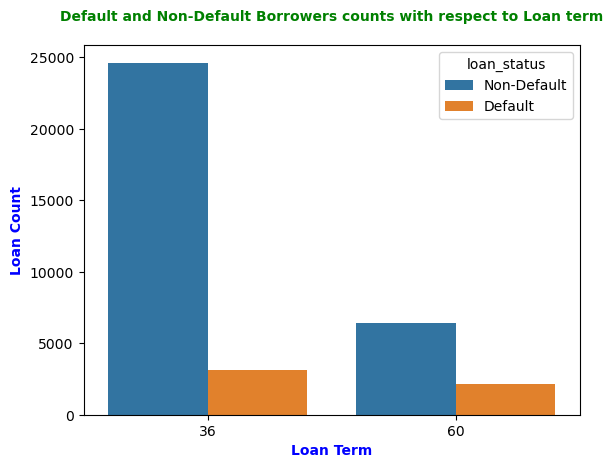

In [37]:
## Since term is an important variable and as it only has two distinct values (36, 60) in months. 

print("Unique values in Term : ",df_lending_club.term.unique(),'\n')
print(get_default_non_default_loan_percentage_and_ratio('term'))

ax = sns.countplot(x='term',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers counts with respect to Loan term\n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Loan Term',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
plt.show()

                     % Default  % Non-Default  Ratio
verification_status                                 
Not Verified              5.79          39.21   0.15
Source Verified           3.74          21.43   0.17
Verified                  5.02          24.82   0.20


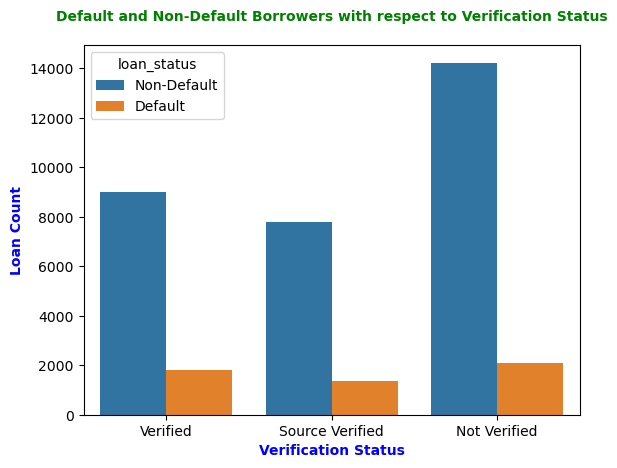

In [38]:
## Verification status is another important variable can affect the loan status, lets check
#Income Verified (Pay Slips, Tax Returns)
#Income Source Verified (3rd Party vendors has checked) • Not Verified)

print(get_default_non_default_loan_percentage_and_ratio('verification_status'))

ax = sns.countplot(x='verification_status',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Verification Status\n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Verification Status',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
plt.show()


#### Inference
<font color='green'> From the barplot above it appears that the risk of lending a loan to borrower increases from Not Verified, Source Verified and Verified. More risk involved to lend loan to Verified borrowers than Non Verified borrowers</font>

                % Default  % Non-Default  Ratio
home_ownership                                 
MORTGAGE             5.79          36.73   0.16
OWN                  1.17           6.63   0.18
RENT                 7.53          41.88   0.18
OTHER                0.05           0.21   0.22


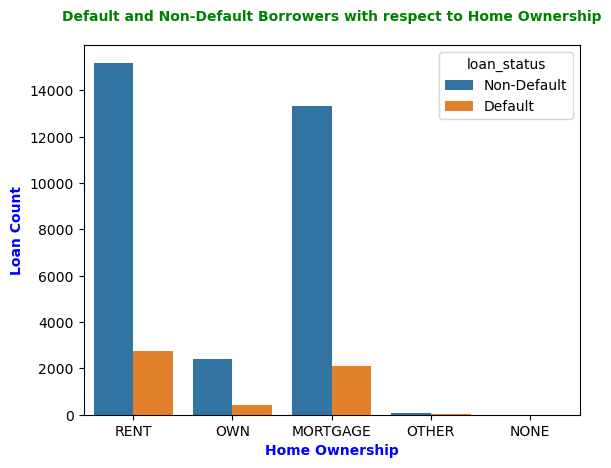

In [39]:
# Checking the home ownership stats for defaulters and genuines

print(get_default_non_default_loan_percentage_and_ratio('home_ownership'))

ax = sns.countplot(x='home_ownership',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Home Ownership\n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Home Ownership',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Loan Count',fontsize=10,fontweight='bold',c='b')
plt.show()

### Inference,
- From the bar plot, % of default and non-default loans and also the ratio of default to non-defaults based on the Home Ownership, we can say that,
    - 8 out of 42 borrowers who are in a rented house will become defaults
    - 6 out of 37 borrowers who are in a mortgage house will become defaults
    - 1 out of 7 borrowers who are in a own house will become defaults
- Risk involved in lending loan to rented and own house is same. Furthermore, risk is comparatively less in lending loan to borrowers in mortgage house.

                    % Default  % Non-Default  Ratio
purpose                                            
wedding                  0.25           2.21   0.11
major_purchase           0.60           5.04   0.12
credit_card              1.40          11.68   0.12
car                      0.44           3.58   0.12
home_improvement         0.87           6.13   0.14
vacation                 0.14           0.86   0.17
debt_consolidation       7.15          39.86   0.18
medical                  0.28           1.48   0.19
house                    0.15           0.77   0.19
other                    1.65           8.50   0.19
moving                   0.25           1.27   0.20
educational              0.15           0.71   0.21
renewable_energy         0.05           0.21   0.24
small_business           1.17           3.15   0.37


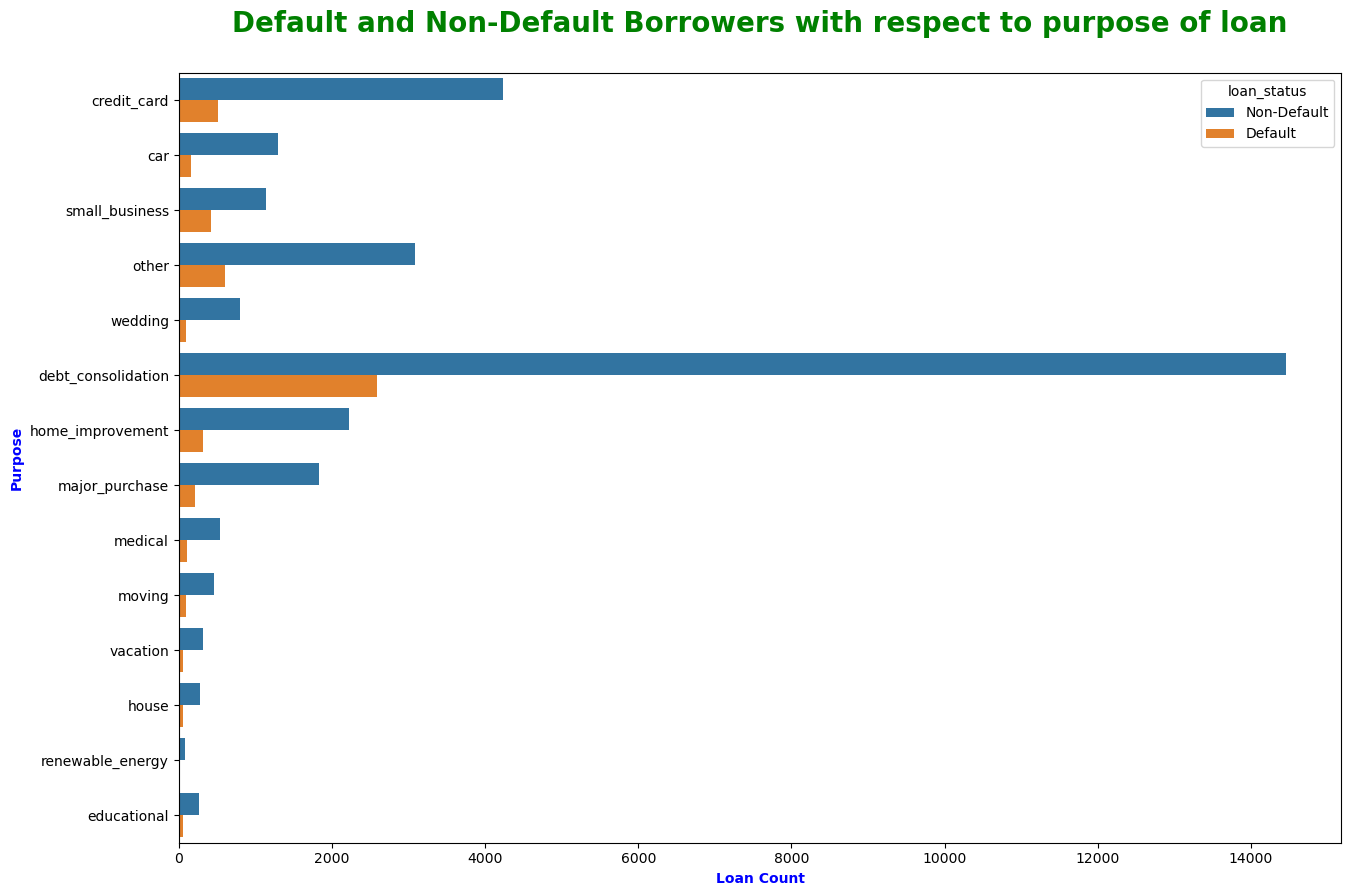

In [40]:
## Identifying various purposes for which loan was taken and the comparison for defaults and successful pay-offs

print(get_default_non_default_loan_percentage_and_ratio('purpose'))

fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y='purpose',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to purpose of loan\n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Loan Count',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Purpose',fontsize=10,fontweight='bold',c='b')
plt.show()

### Inference,
- From the above bar plot, % of default and non-default loans and also the ratio of default to non-defaults based on the loan purpose, we can say the risk of lending a loan increases in the below order,
   - wedding 
   - major_purchase
   - credit_card
   - car
   - home_improvement
   - vacation
   - debt_consolidation
   - medical
   - house
   - other
   - moving
   - educational
   - renewable_energy
   - small_business
   
- Risk involved in lending loan to for the purpose of small_business is more and is less for wedding.

            % Default  % Non-Default  Ratio
addr_state                                 
WY               0.01           0.21   0.04
DC               0.03           0.50   0.07
MS               0.01           0.05   0.12
DE               0.03           0.26   0.12
AR               0.07           0.55   0.13
VT               0.02           0.13   0.13
TX               0.78           5.97   0.13
KS               0.08           0.59   0.13
AL               0.13           1.00   0.13
TN               0.01           0.04   0.13
PA               0.47           3.42   0.14
WV               0.06           0.40   0.14
MA               0.41           2.92   0.14
MT               0.03           0.20   0.14
LA               0.14           0.97   0.14
CO               0.25           1.76   0.14
VA               0.45           3.11   0.15
RI               0.07           0.45   0.15
OH               0.40           2.71   0.15
NY               1.26           8.18   0.15
MN               0.22           

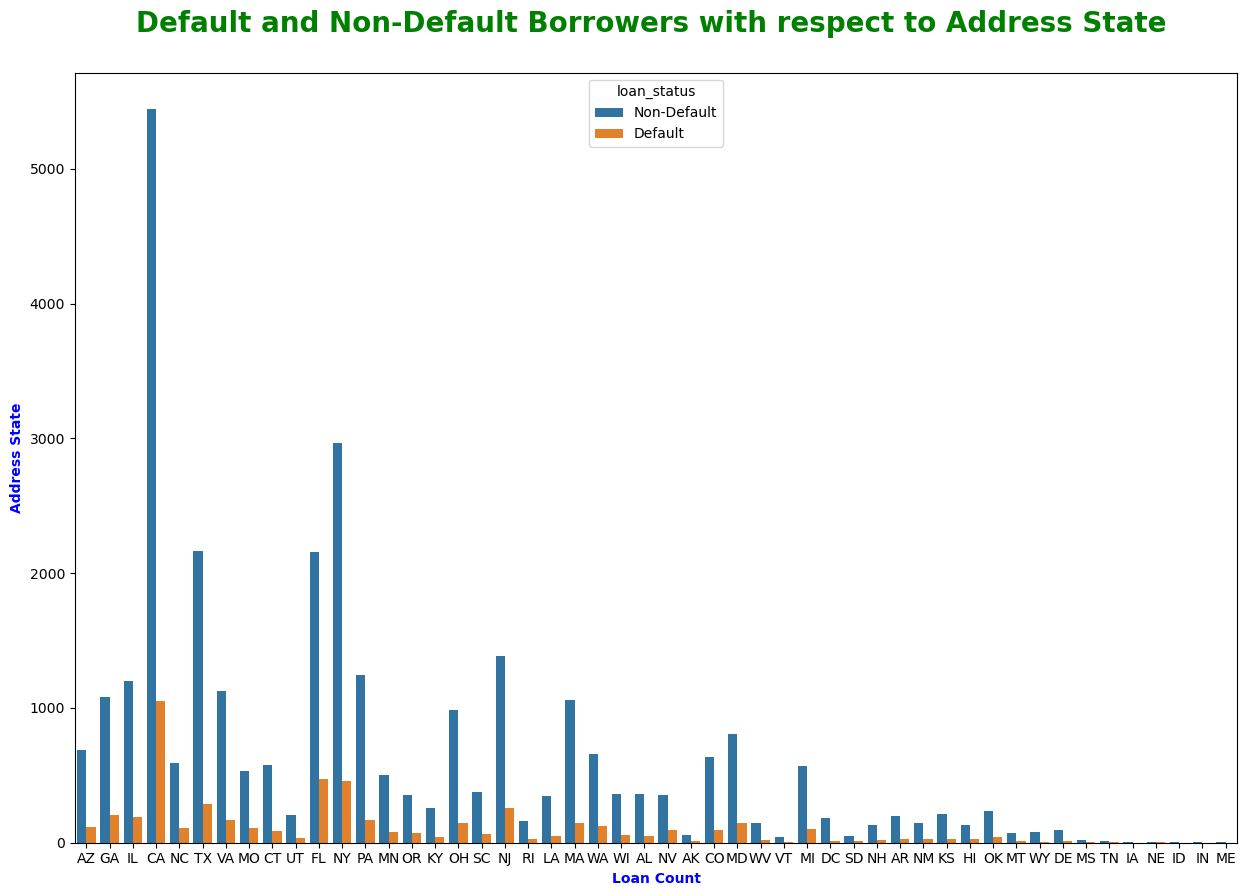

In [41]:
## comparison against the state address

print(get_default_non_default_loan_percentage_and_ratio('addr_state'))

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='addr_state',hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Address State \n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabel('Loan Count',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Address State',fontsize=10,fontweight='bold',c='b')

plt.show()

In [42]:
# plot agaiinst employment time (imputation not performed)

print(get_default_non_defaul_loan_percentage_and_ratio('emp_length'))

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='emp_length',order=['0','1','2','3','4','5','6','7','8','9','10'],hue='loan_status',data=df_lending_club)
ax.set_title('Default and Non-Default Borrowers with respect to Employee Experience \n', fontsize=10, fontweight='bold',c='g')
ax.set_xlabel('Loan Count',fontsize=10,fontweight='bold',c='b')
ax.set_ylabel('Employee Experience',fontsize=10,fontweight='bold',c='b')
plt.show()


NameError: name 'get_default_non_defaul_loan_percentage_and_ratio' is not defined

## Univariate Analysis : Continous Variable

In [ ]:
df_lending_club.describe()

In [ ]:
# Loan Amount Distribution

ax = sns.displot(df_lending_club['loan_amnt'],bins=10)
ax.set_titles('Distribution of loan \n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabels('Number of Loans',fontsize=10,fontweight='bold',c='b')
ax.set_ylabels('Loan Amount',fontsize=10,fontweight='bold',c='b')
plt.show()

In [ ]:
# Funded amount density distribution

ax = sns.displot(df_lending_club['funded_amnt'],bins=10)
ax.set_titles('Distribution of funded amount \n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabels('Number of Loans',fontsize=10,fontweight='bold',c='b')
ax.set_ylabels('Funded Amount',fontsize=10,fontweight='bold',c='b')

plt.show()

In [ ]:
# funded_amnt_inv density distributions

ax = sns.displot(df_lending_club['funded_amnt_inv'],bins=10)
ax.set_titles('Distribution of funded amount by investor \n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabels('Number of Loans',fontsize=10,fontweight='bold',c='b')
ax.set_ylabels('Funded Amount by Investor',fontsize=10,fontweight='bold',c='b')
plt.show()

#### All the above three variables appear to have similar trends with their density plots. which indicates high correlation among themselves

In [ ]:
ax = sns.displot(df_lending_club['installment'],bins=10)
ax.set_titles('Distribution of funded amount by investor \n', fontsize=20, fontweight='bold',c='g')
ax.set_xlabels('Number of Loans',fontsize=10,fontweight='bold',c='b')
ax.set_ylabels('Funded Amount by Investor',fontsize=10,fontweight='bold',c='b')
plt.show()

In [ ]:
## density plot for annual income

df_lending_club['annual_inc'].plot(kind='density')
plt.show()

## Bivariate Correlation Matrix

In [ ]:
sns.heatmap(df_lending_club.corr(), 
        xticklabels=df_lending_club.corr().columns,
        yticklabels=df_lending_club.corr().columns,annot=True)
plt.show()

In [ ]:
corr = df_lending_club.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)


In [ ]:
sns.pairplot(data=df_lending_club[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','loan_status']],hue='loan_status')
plt.show()